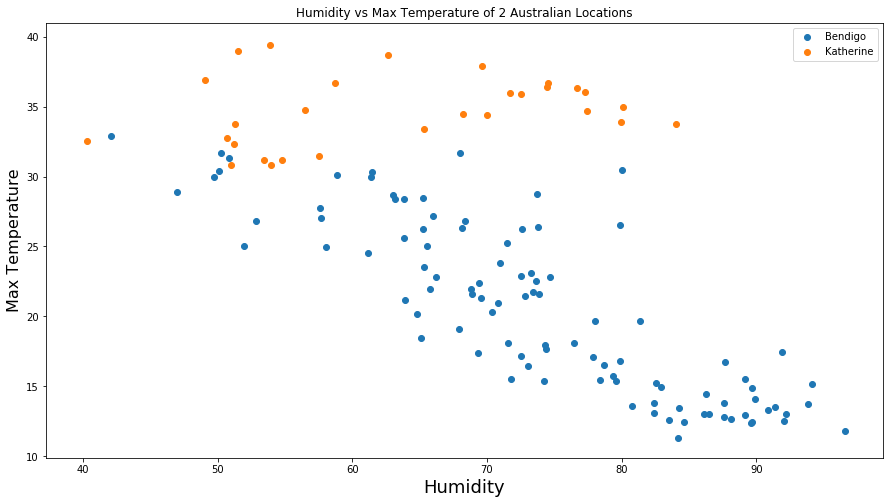

<Figure size 1080x576 with 0 Axes>

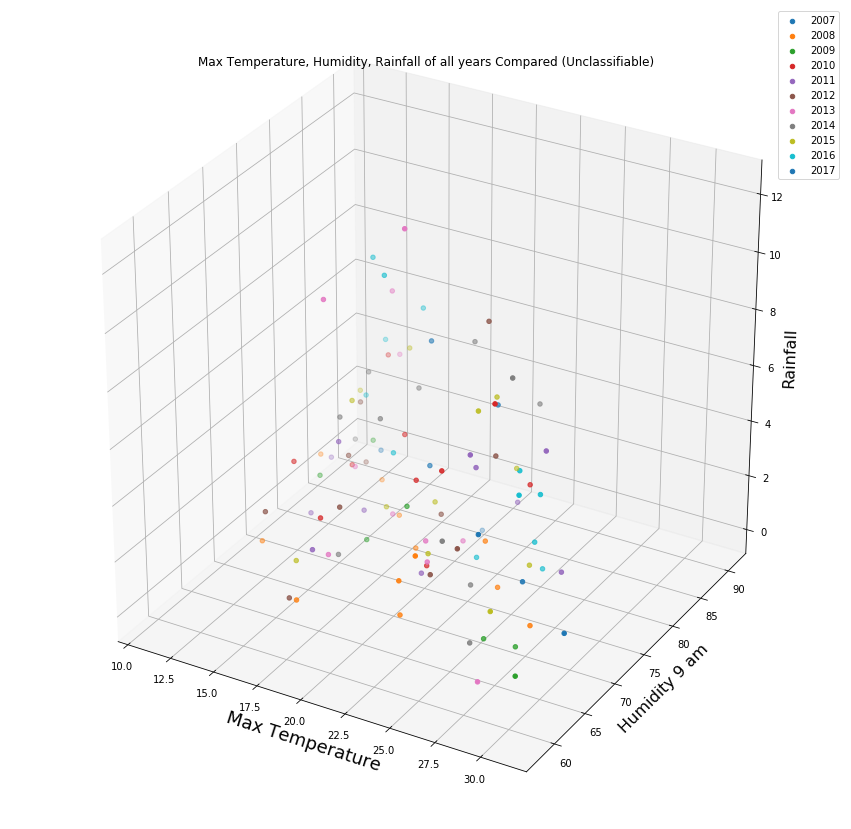

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

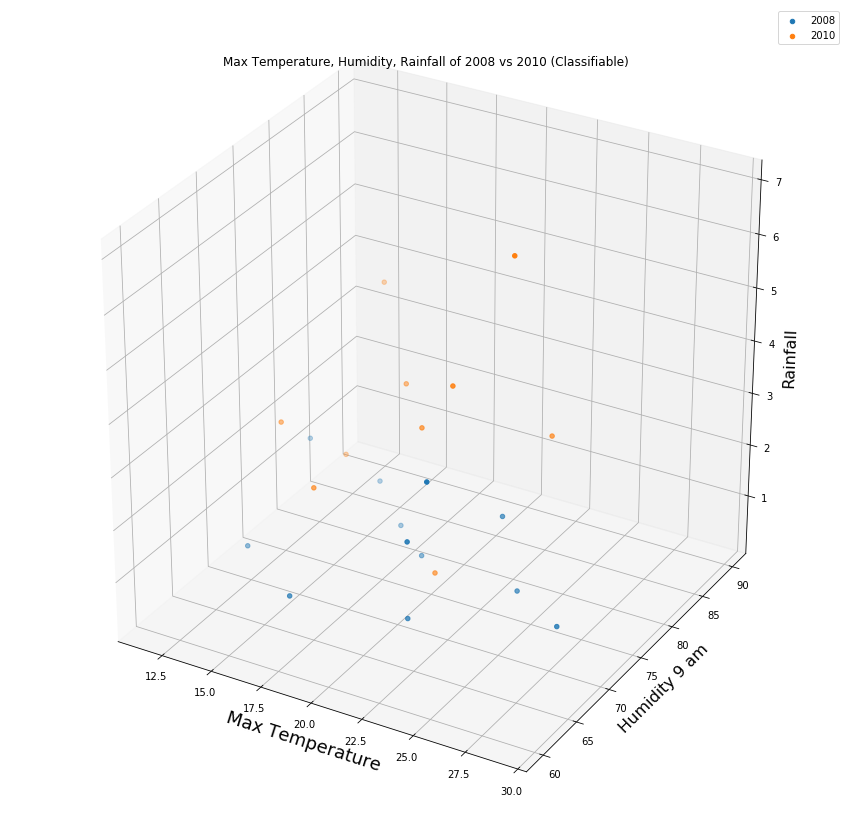

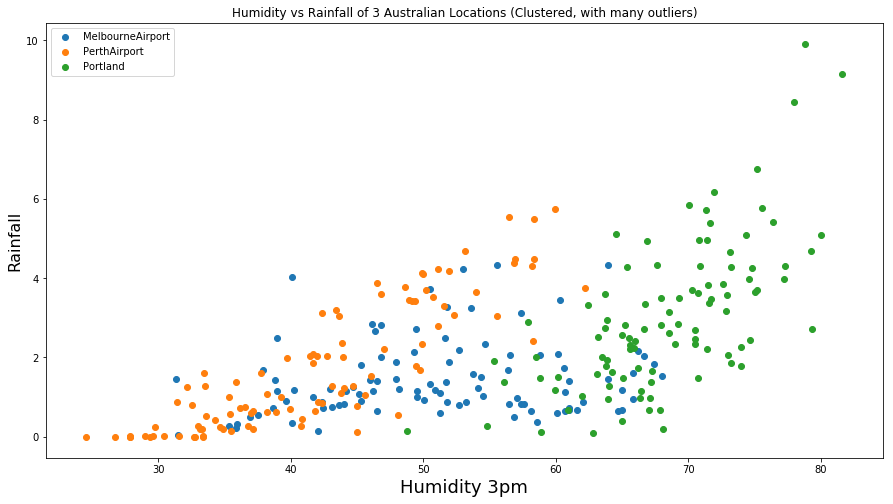

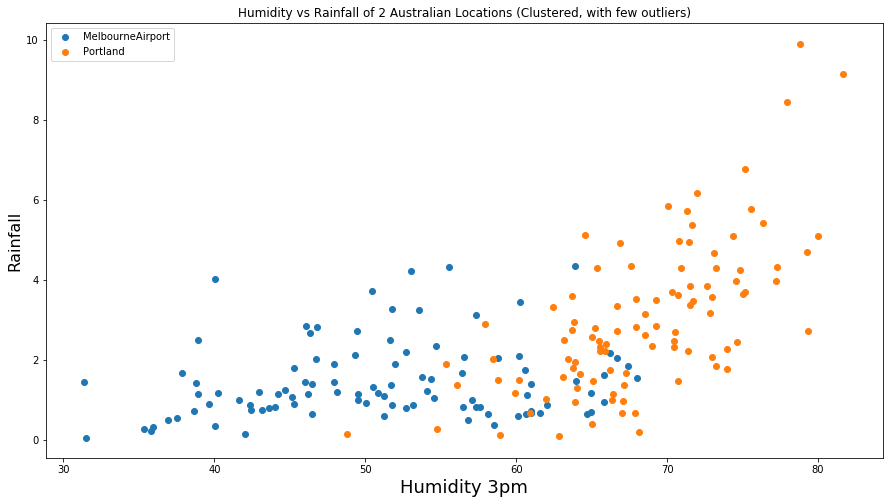

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d


df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")

grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am"].mean().reset_index()

#print grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall[ (grouped_2013["Location"]=="Katherine")  | (grouped_2013["Location"]=="Bendigo") ]

#print grouped_2013



plt.figure(figsize=(15,8))
plt.title("Humidity vs Max Temperature of 2 Australian Locations")
plt.xlabel('Humidity', fontsize=18)
plt.ylabel('Max Temperature', fontsize=16)
#EXAMPLE OF A SIMPLE TWO DIVISION CLUSTER. DATA FROM EITHER ONE OF THE SOURCES CAN BE CLASSIFIED TO EITHER ONE BASED ON SOME CLASSIFICATION ALGORITHM
for name,group in grouped_2013.groupby("Location"):
    plt.scatter(group["Humidity9am"],group["MaxTemp"],label=name)
    plt.legend()
 


grouped3d = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am","Rainfall"].mean().reset_index()

grouped3d = grouped3d[grouped3d["Location"]=="Canberra"]

#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Max Temperature, Humidity, Rainfall of all years Compared (Unclassifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()

    
grouped3d = grouped3d[grouped3d["Location"]=="Canberra"].reset_index()

grouped3d =  grouped3d[(grouped3d["Date"].str[:4] == "2010") | (grouped3d["Date"].str[:4] == "2008")]

#DATA HERE CAN BE CLASSIFIED BETWEEN 2008 and 2010

#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Max Temperature, Humidity, Rainfall of 2008 vs 2010 (Classifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()


canberra_rainfall_df = df.groupby([df.Date.str[:7],"Location"]).mean().reset_index()[["Humidity3pm","Rainfall","Location"]]
canberra_df_humidity = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Humidity3pm"]]
canberra_df_clouds = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Cloud3pm"]]

#print canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Katherine")  | (canberra_rainfall_df["Location"]=="Bendigo")]
#print canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport")]
#canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Katherine")  | (canberra_rainfall_df["Location"]=="Bendigo")]

canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") | (canberra_rainfall_df["Location"]=="PerthAirport") ]


plt.title("Humidity vs Rainfall of 3 Australian Locations (Clustered, with many outliers)")
plt.xlabel('Humidity 3pm', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
for name,group in canberra_rainfall_df.groupby("Location"):
    plt.scatter(group["Humidity3pm"],group["Rainfall"],label=name)
    plt.legend()

    
    
plt.show()

plt.figure(figsize=(15,8))
canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") ]



plt.title("Humidity vs Rainfall of 2 Australian Locations (Clustered, with few outliers)")
plt.xlabel('Humidity 3pm', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
for name,group in canberra_rainfall_df.groupby("Location"):
    plt.scatter(group["Humidity3pm"],group["Rainfall"],label=name)
    plt.legend()


plt.show()


In [18]:
grouped_2013

,Date,Location,MaxTemp,Humidity9am,class
41,2008-12,Bendigo,24.930000,58.033333,0
55,2009-01,Bendigo,32.864516,42.096774,0
85,2009-02,Bendigo,31.324000,50.880000,0
115,2009-03,Bendigo,26.225000,65.250000,0
145,2009-04,Bendigo,21.151724,63.896552,0
175,2009-05,Bendigo,18.100000,71.586207,0
205,2009-06,Bendigo,13.275000,90.833333,0
235,2009-07,Bendigo,12.796000,87.600000,0
265,2009-08,Bendigo,15.211538,82.538462,0
294,2009-09,Bendigo,17.371429,69.321429,0


In [14]:
#grouped_2013 = grouped_by_month_rainfall[ (grouped_2013["Location"]=="Katherine")  | (grouped_2013["Location"]=="Bendigo") ]
#grouped_2013
grouped_2013['class'] = np.where(grouped_2013['Location']=='Bendigo', 0, 1)



/home/anirudh/Courses/Machine_Learning/Assignments/Assignment/envname/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
grouped_2013

,Date,Location,MaxTemp,Humidity9am,class,color
41,2008-12,Bendigo,24.930000,58.033333,0,0
55,2009-01,Bendigo,32.864516,42.096774,0,0
85,2009-02,Bendigo,31.324000,50.880000,0,0
115,2009-03,Bendigo,26.225000,65.250000,0,0
145,2009-04,Bendigo,21.151724,63.896552,0,0
175,2009-05,Bendigo,18.100000,71.586207,0,0
205,2009-06,Bendigo,13.275000,90.833333,0,0
235,2009-07,Bendigo,12.796000,87.600000,0,0
265,2009-08,Bendigo,15.211538,82.538462,0,0
294,2009-09,Bendigo,17.371429,69.321429,0,0


In [16]:
del grouped_2013["color"]

In [17]:
grouped_2013

,Date,Location,MaxTemp,Humidity9am,class
41,2008-12,Bendigo,24.930000,58.033333,0
55,2009-01,Bendigo,32.864516,42.096774,0
85,2009-02,Bendigo,31.324000,50.880000,0
115,2009-03,Bendigo,26.225000,65.250000,0
145,2009-04,Bendigo,21.151724,63.896552,0
175,2009-05,Bendigo,18.100000,71.586207,0
205,2009-06,Bendigo,13.275000,90.833333,0
235,2009-07,Bendigo,12.796000,87.600000,0
265,2009-08,Bendigo,15.211538,82.538462,0
294,2009-09,Bendigo,17.371429,69.321429,0
